In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [5]:
df= pd.read_csv(r"C:\Users\yigit\Downloads\archive(24)\E-commerce Customer Behavior - Sheet1.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [11]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [15]:
df.fillna(df.mode().iloc[0], inplace=True)

In [17]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [25]:
Gender = df['Gender'].value_counts().reset_index()
Gender


,Gender,count
0,Female,175
1,Male,175


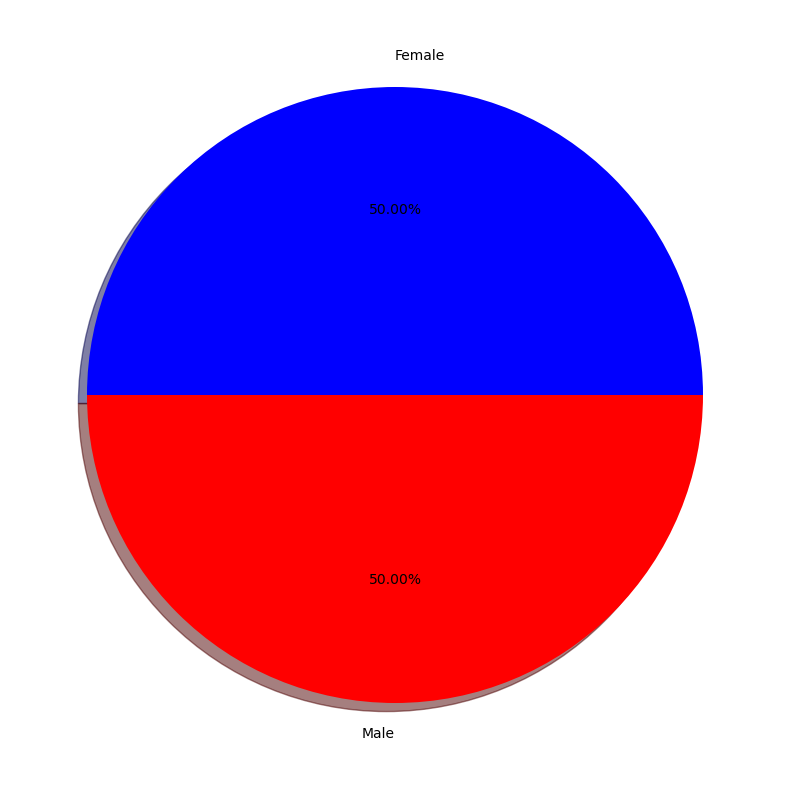

In [29]:
plt.figure(figsize=(10,10))
plt.pie(Gender["count"], colors=["blue" , "red"],
        shadow=True,labels=Gender['Gender'],
         autopct='%1.2f%%' )
plt.legend()
plt.show()

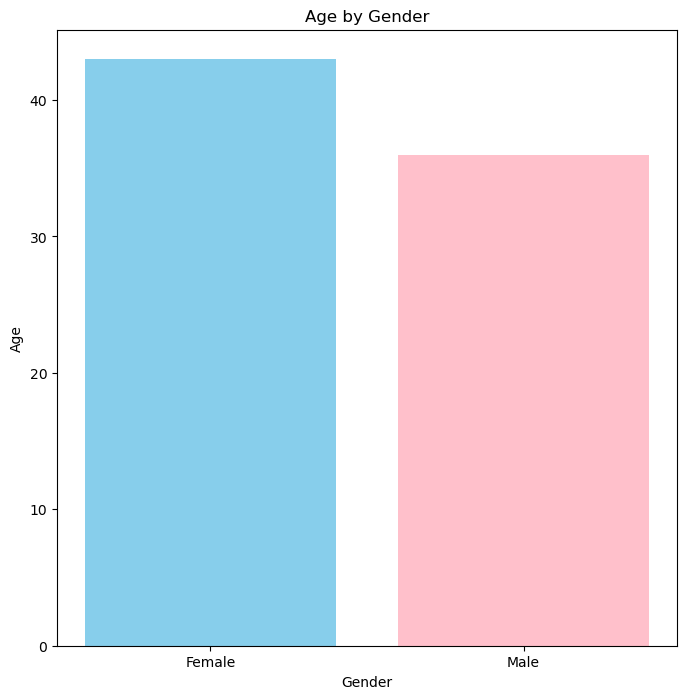

In [37]:
plt.figure(figsize=(8, 8))
plt.bar(df['Gender'], df['Age'], color=['pink', 'skyblue'])

plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age by Gender")
plt.show()

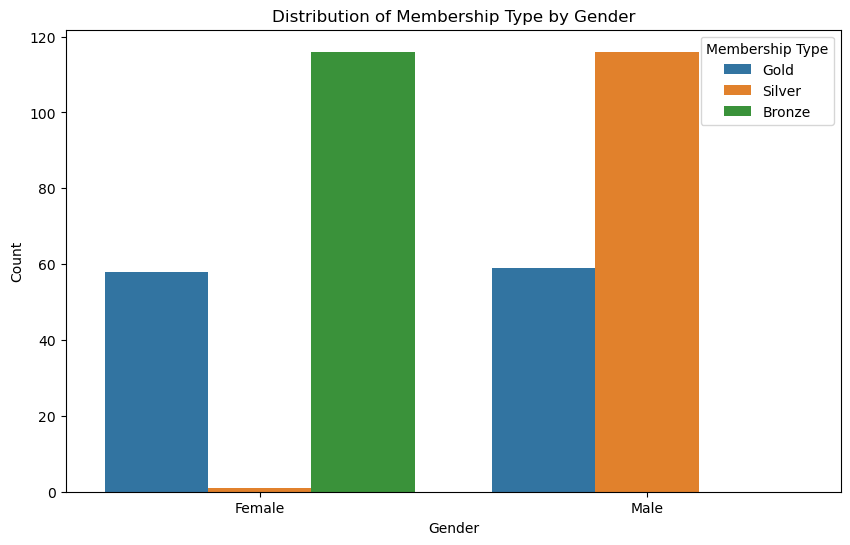

In [41]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Gender", hue="Membership Type")

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Membership Type by Gender")
plt.legend(title="Membership Type")
plt.show()

C:\Users\yigit\AppData\Local\Temp\ipykernel_44880\1986471318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Satisfaction Level", palette="coolwarm")


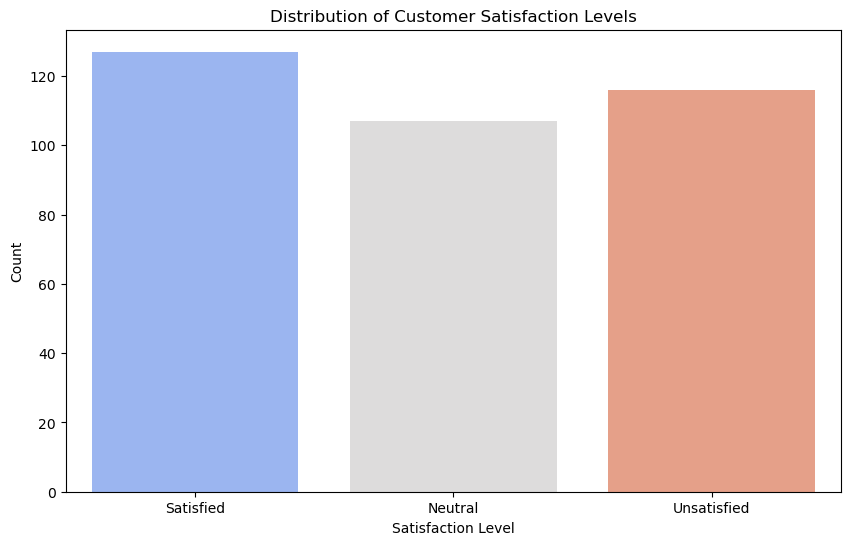

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Satisfaction Level", palette="coolwarm")

plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.title("Distribution of Customer Satisfaction Levels")
plt.show()


C:\Users\yigit\AppData\Local\Temp\ipykernel_44880\330691187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Satisfaction Level", y="Total Spend", palette="coolwarm")


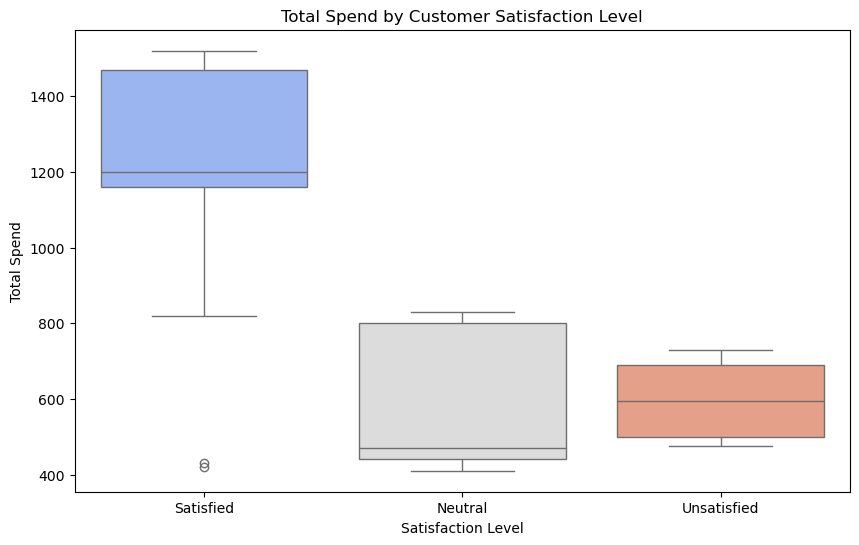

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Satisfaction Level", y="Total Spend", palette="coolwarm")

plt.xlabel("Satisfaction Level")
plt.ylabel("Total Spend")
plt.title("Total Spend by Customer Satisfaction Level")
plt.show()


In [47]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df = pd.get_dummies(df, columns=['Membership Type'], drop_first=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Satisfaction Level'] = le.fit_transform(df['Satisfaction Level'])

df['Discount Applied'] = df['Discount Applied'].astype(int)

df.head()

,Customer ID,Gender,Age,City,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership Type_Gold,Membership Type_Silver
0,101,1,29,New York,1120.20,14,4.6,1,25,1,True,False
1,102,0,34,Los Angeles,780.50,11,4.1,0,18,0,False,True
2,103,1,43,Chicago,510.75,9,3.4,1,42,2,False,False
3,104,0,30,San Francisco,1480.30,19,4.7,0,12,1,True,False
4,105,0,27,Miami,720.40,13,4.0,1,55,2,False,True


In [51]:

df[['Membership Type_Gold', 'Membership Type_Silver']] = df[['Membership Type_Gold', 'Membership Type_Silver']].astype(int)
df['Discount Applied'] = df['Discount Applied'].astype(int)

df.head()  


,Customer ID,Gender,Age,City,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership Type_Gold,Membership Type_Silver
0,101,1,29,New York,1120.20,14,4.6,1,25,1,1,0
1,102,0,34,Los Angeles,780.50,11,4.1,0,18,0,0,1
2,103,1,43,Chicago,510.75,9,3.4,1,42,2,0,0
3,104,0,30,San Francisco,1480.30,19,4.7,0,12,1,1,0
4,105,0,27,Miami,720.40,13,4.0,1,55,2,0,1


In [53]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,Customer ID,Gender,Age,City,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Membership Type_Gold,Membership Type_Silver
0,101,1,-0.945152,New York,0.760130,0.337346,1.001981,1,-0.118359,1,1,0
1,102,0,0.082826,Los Angeles,-0.179459,-0.385538,0.139479,0,-0.639907,0,0,1
2,103,1,1.933185,Chicago,-0.925570,-0.867461,-1.068024,1,1.148256,2,0,0
3,104,0,-0.739557,San Francisco,1.756144,1.542153,1.174482,0,-1.086947,1,1,0
4,105,0,-1.356343,Miami,-0.345692,0.096385,-0.033022,1,2.116844,2,0,1


C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

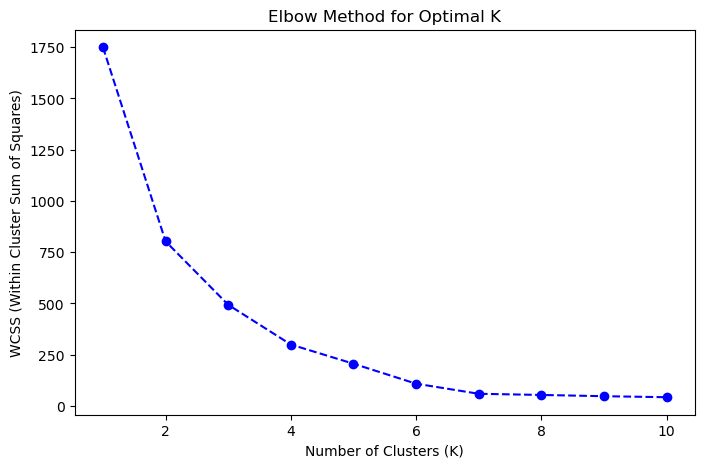

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(df[num_cols])  
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [59]:
optimal_k = 3 

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[num_cols])

print(df[['Cluster']].value_counts())  


C:\Users\yigit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster
0          117
2          117
1          116
Name: count, dtype: int64


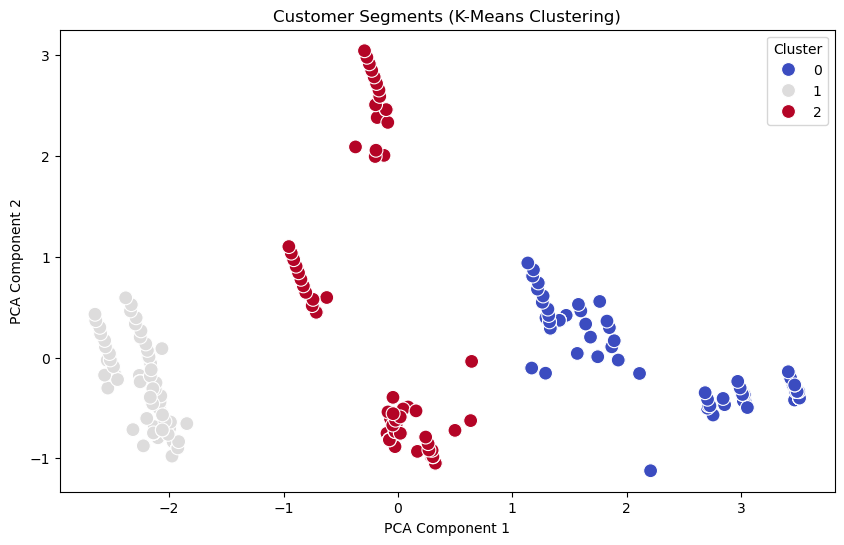

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_cols])  

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


plt.figure(figsize=(10,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='coolwarm', s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (K-Means Clustering)")
plt.legend(title="Cluster")
plt.show()


In [65]:
cluster_summary = df.groupby("Cluster").agg({
    "Total Spend": "mean",
    "Items Purchased": "mean",
    "Average Rating": "mean",
    "Days Since Last Purchase": "mean",
    "Satisfaction Level": "mean"
}).reset_index()

pd.set_option('display.float_format', '{:.2f}'.format)  
display(cluster_summary)  



,Cluster,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Satisfaction Level
0,0,1.29,1.21,1.13,-0.64,1.00
1,1,-1.03,-0.99,-1.20,0.37,1.02
2,2,-0.27,-0.23,0.06,0.27,1.06


In [69]:
from sklearn.ensemble import RandomForestRegressor

X = df[["Age", "Items Purchased", "Average Rating", "Days Since Last Purchase", "Satisfaction Level"]]
y = df["Total Spend"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

pd.set_option('display.float_format', '{:.4f}'.format)  
display(feature_importances)



,Feature,Importance
1,Items Purchased,0.5772
2,Average Rating,0.3637
0,Age,0.0272
3,Days Since Last Purchase,0.0271
4,Satisfaction Level,0.0049
